## 数据挖掘 hw1 q1

### 数据预处理
引入pandas和numpy，读取csv，要用到的`pluno`和`vipno`转成str方便截取，补充缺失值。

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("trade_new.csv")
dataset["pluno"]=dataset["pluno"].astype("str")
dataset["vipno"]=dataset["vipno"].astype("str")
dataset["pluno_5"]=dataset["pluno"].apply(lambda x: x[:5])
dataset=dataset.fillna(0)

dataset

,uid,sldatime,pno,cno,cmrid,vipno,id,pluno,bcd,pluname,...,bndno,bndname,qty,amt,disamt,ismmx,mtype,mdocno,isdel,pluno_5
0,16072913541329219,2016-07-29 13:54:22,13,8323,男[45 以上],2900003115009,2,22002240,200328600506004228,红油桃（中）,...,0.0,0,0.422,5.06,0.0,0,0,0.0,0,22002
1,16060809581811553,2016-06-08 09:58:40,18,8334,女[18 - 25],2900001575201,5,34150006,6926458841290,MSU男童平脚裤 74129,...,34224.0,真想你,1.000,27.90,0.0,0,0,0.0,0,34150
2,16022416071404989,2016-02-24 16:07:08,14,8305,女[31 - 45],1591040161114,2,11054040,6910019008819,雕牌超效加酶洗衣粉4000g,...,0.0,0,1.000,33.90,0.0,0,0,0.0,0,11054
3,16052118091609506,2016-05-21 18:09:33,16,8308,女[18 - 25],1591016439575,2,27400855,211211400800000011,菜煎饼,...,0.0,0,0.001,8.00,0.0,0,0,0.0,0,27400
4,16040315451414179,2016-04-03 15:45:23,14,8306,女[18 - 25],1591015027858,2,11110121,111101214,欧莱雅系列,...,0.0,0,39.000,39.00,0.0,0,0,0.0,0,11110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22594,16072318461403789,2016-07-23 18:46:14,14,8305,女[18 - 25],2900000476042,2,10100010,5290074003198,果芬100%橙汁1L,...,10706.0,进口品牌,1.000,15.80,0.0,0,0,0.0,0,10100
22595,16071517501803300,2016-07-15 17:50:04,18,8306,女[18 - 25],1591016440328,9,15209032,5900120010024,罗兹姑娘全脂牛奶1L,...,15123.0,进口食品,1.000,13.80,0.0,0,0,0.0,0,15209
22596,16070214021428532,2016-07-02 14:02:44,14,8323,女[18 - 25],2900000448520,4,15209031,5900159000133,乐途全脂牛奶1L,...,15123.0,进口食品,1.000,13.80,0.0,0,0,0.0,0,15209
22597,16072518331809369,2016-07-25 18:33:15,18,8337,男[45 以上],2900000604360,13,15209031,5900159000133,乐途全脂牛奶1L,...,15123.0,进口食品,1.000,13.80,0.0,0,0,0.0,0,15209


由于只涉及vipno和对应pluno_5的汇总amt值，我想到了用pandas中的pivot_table 进行汇总。

In [2]:
pv_ds = pd.pivot_table(dataset,index=["vipno","pluno_5"],values=["amt"],aggfunc=np.sum)
pv_ds

amt
vipno       pluno_5        
13325038116 10150       4.0
            10201       2.0
            10300     156.0
            10450    1110.0
            14815       5.6
...                     ...
781924      15120      15.0
            15200     115.0
            15202       4.9
            23113      18.0
            34023      15.0

[12761 rows x 1 columns]

创建一个新的dataframe，为某个用户生成一行，每列对应其购买的一个pluno_5的购买量。

In [3]:
data=dict()
for index in pv_ds.index:
    if index[0] not in data:
        data[index[0]]=dict()
    data[index[0]][index[1]]=float(pv_ds.loc[index])

ds=pd.DataFrame(list(data.values()), index=list(data.keys()))
ds=ds.fillna(0)

ds

,10150,10201,10300,10450,14815,15114,15120,15232,22712,23110,...,14816,10443,10120,14902,30604,30340,30612,34032,31131,21020
13325038116,4.0,2.0,156.0,1110.0,5.60,10.4,81.6,6.5,27.54,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13854627199,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13864739266,0.0,0.0,0.0,0.0,0.00,0.0,0.0,15.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590120464497,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590120718170,0.0,0.0,0.0,0.0,4.99,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900003123479,10.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6222021615010082737,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6227002180901670266,0.0,20.5,0.0,0.0,0.00,0.0,28.5,0.0,0.00,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6227002180921663895,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### K-means 聚类算法实现
在实现前，我参考了各种网友实现的k-means，虽然逻辑清晰，但是运行速度慢，远不如scikit-learning中自带的算法，代码中充斥了丑陋的for循环。所以我充分利用的numpy中矩阵的矢量化思想，使用np.tile()或np.tile()扩充二维矩阵到三维，原先for循环内部的步骤可以在第三个维度上并行计算，实现了k-means without for。当然sklearn的k-means的源码的可扩展性(距离度量被全部封装在$metrics$类当中)和对边界情况考虑的完备性是需要我学习的。

In [4]:
def choose_random_k(n_sample,k):
    cols = [i for i in range(n_sample)]
    np.random.shuffle(cols)
    return cols[:k]

def jaccard(d,cores):
    tc=np.tile(cores,(d.shape[0],1,1))
    return 1-np.sum(np.minimum(d,tc),axis=2)/np.sum(np.maximum(d,tc),axis=2)

In [5]:
def greil_kmeans(ds, k):
    """
    k 簇的数量
    ds 数据集
    """
    n_sample, n_feature = ds.shape
    result = np.empty(n_sample, dtype=np.int)
    cores = ds[choose_random_k(n_sample,k)]
    
    while True: 
        # k为几， 矩阵第三维就被扩充到几，实现并行计算
        d = np.repeat(ds,k,axis=0).reshape(n_sample,k,n_feature)      
        distance=jaccard(d,cores)
        index_min = np.argmin(distance, axis=1) # 每个样本距离最近的质心索引序号
        if (index_min == result).all():
            return result, cores
        result = index_min # 重新分类
        for i in range(k): # 遍历质心集
            items = ds[result==i] # 找出对应当前质心的子样本集
            cores[i] = np.mean(items, axis=0) # 以子样本集的均值作为当前质心的位置

In [6]:
result,cores=greil_kmeans(ds.values, 2)
result

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

通过数据预处理中最后产生的数据集，产生距离矩阵

In [7]:
def get_jacard_matrix(dv):
    n_vipno=dv.shape[0]
    dm=np.empty((n_vipno,n_vipno))
    for i in range(n_vipno):
        for j in range(n_vipno):
            dm[i,j]=dm[j,i]=1-np.sum(np.minimum(dv[i],dv[j]))/np.sum(np.maximum(dv[i],dv[j]))
    return dm

### 聚类度量指标
聚类指标分别有$Silhouette\ Coefficient$和 $Compactness$, 我分别进行了实现，同时sklearn里也有 SC ,分别进行了对比

In [8]:
def get_silhouette_coefficient(dm,result):
    n_sample = len(result)
    scs = np.empty(n_sample)
    n_k = len(np.unique(result))
    
    for i in range(n_sample):
        # 获得簇所在索引
        min_dist=float("inf")
        for c in range(n_k):
            if not c==result[i]:
                outpts=dm[i,np.where(result==c)]
                outdist=np.sum(outpts,axis=1)/outpts.shape[1]
                if outdist<min_dist:
                    min_dist=outdist

        inpts=dm[i,np.where(result==result[i])]
        if inpts.shape[1] == 1:
            scs[i]= 0
        else:
            in_dist=np.sum(inpts,axis=1)/(inpts.shape[1]-1)
            scs[i]= (min_dist-in_dist)/max(min_dist,in_dist)
    return np.mean(scs)

def get_compactness(dv,result,cores):
    n_sample = dv.shape[0]
    n_cluster=cores.shape[0]
    cts = np.empty((n_cluster,1))
    total_compactness = 0
    
    for i in range(n_cluster):
        dists = dv[np.where(result==i)]
        cpt=np.mean(dists,axis=0)
        dist=1-np.sum(np.minimum(dists,cpt),axis=1)/np.sum(np.maximum(dists,cpt),axis=1)
        avg_dist=np.sum(dist)/dists.shape[0]
        total_compactness = total_compactness + avg_dist
    return total_compactness / n_cluster

计算距离矩阵

In [9]:
dm=get_jacard_matrix(ds.values)

dm

array([[0.        , 0.99038198, 0.996511  , ..., 0.95730739, 0.99299373,
        0.99205424],
       [0.99038198, 0.        , 0.95512433, ..., 0.97962518, 0.98954303,
        1.        ],
       [0.996511  , 0.95512433, 0.        , ..., 0.98622114, 0.99734946,
        1.        ],
       ...,
       [0.95730739, 0.97962518, 0.98622114, ..., 0.        , 0.9828332 ,
        0.95268378],
       [0.99299373, 0.98954303, 0.99734946, ..., 0.9828332 , 0.        ,
        0.98720889],
       [0.99205424, 1.        , 1.        , ..., 0.95268378, 0.98720889,
        0.        ]])

一共有486个用户，测试 $Compactness$ 随 $k$ 变化趋势

In [12]:
cps=dict()
for k in range(2,101):
    box=list()
    for attempt in range(5):
        result,cores=greil_kmeans(ds.values, k)
        cp =get_compactness(ds.values,result,cores)
        box.append(cp)
    print("{}-means cp：".format(k),np.mean(box))
    cps[k] = np.mean(box)

2-means cp： 0.9314923724524191
3-means cp： 0.926400591604456
4-means cp： 0.9311617923292052
5-means cp： 0.9259948109960578
6-means cp： 0.9210275403691704
7-means cp： 0.9219428061085018
8-means cp： 0.9219132335307147
9-means cp： 0.9147373485616626
10-means cp： 0.9149580810019622
11-means cp： 0.872031224666463
12-means cp： 0.9090431668074537
13-means cp： 0.9029364113122127
14-means cp： 0.9065775327807754
15-means cp： 0.8988001035941626
16-means cp： 0.8907148851369815
17-means cp： 0.8974671138387993
18-means cp： 0.8707008981992235
19-means cp： 0.8930869657554106
20-means cp： 0.8897634038489166
21-means cp： 0.8690061763390988
22-means cp： 0.8486218329937196
23-means cp： 0.8859224051107726
24-means cp： 0.8601154595594427
25-means cp： 0.83999239776472
26-means cp： 0.8782623467763959
27-means cp： 0.8448472894601669
28-means cp： 0.8742725411693928
29-means cp： 0.8669172693376993
30-means cp： 0.8553773839555117
31-means cp： 0.8640610420392457
32-means cp： 0.8275124258598582
33-means cp： 0.82774

同样486个用户，测试 $Silhouette\ Coefficient$ 变化趋势。

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
scs=dict()
for k in range(2,101):
    mybox=list()
    skbox=list()
    result,cores=greil_kmeans(ds.values, k)
    score = get_silhouette_coefficient(dm,result)
    score2= silhouette_score(dm, result, metric="precomputed")
    mybox.append(score)
    skbox.append(score2)
    print("sk {}-means sc:".format(k),score2)
    #print("my {}-means sc:".format(k),score)
    scs[k] = score
    print('-'*30)

sk 2-means sc: 0.010977661936282213
------------------------------
sk 3-means sc: 0.008688230026099456
------------------------------
sk 4-means sc: 0.00761523412695834
------------------------------
sk 5-means sc: 0.009150314552740067
------------------------------
sk 6-means sc: 0.010187556114577796
------------------------------
sk 7-means sc: 0.011135917317983957
------------------------------
sk 8-means sc: 0.009844452536821948
------------------------------
sk 9-means sc: 0.009334667964645063
------------------------------
sk 10-means sc: 0.010300716574566621
------------------------------
sk 11-means sc: 0.012801956149819221
------------------------------
sk 12-means sc: 0.01034024458785005
------------------------------
sk 13-means sc: 0.010461526729866083
------------------------------
sk 14-means sc: 0.010369663800100312
------------------------------
sk 15-means sc: 0.010789313414060692
------------------------------
sk 16-means sc: 0.011939736391795068
---------------------

### 聚类结果分析
分别作出 $SC$ 和 $CP$ 随着 $k$ 的变化趋势散点图，并用三次函数拟合

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def draw_trend(x,y,n,lbx,lby,title):
    fig =plt.figure(2)
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x,y,s=5,c='b',marker=(10,1),alpha=1 ,lw=1,facecolors='none')
    ax.set_title(title)
    plt.xlabel(lbx)#x轴上的名字
    plt.ylabel(lby)#y轴上的名字 
    
    parameter = np.polyfit(x, y, n) # n=1为一次函数，返回函数参数
    f = np.poly1d(parameter) # 拼接方程
    plt.plot(x, f(x),"black")
    
    plt.show()
    
def draw_dist_freq(dm):
    hist,bins = np.histogram(list(dm.flatten()),bins = 200)
    hist = hist/(dm.shape[0] * dm.shape[1])

    plt.bar(list(bins)[1:],list(hist),width=0.01)
    plt.title("Scale of Distance") 
    plt.xlabel("distance")#x轴上的名字
    plt.ylabel("frequency")#y轴上的名字 
    plt.show()



距离分布：

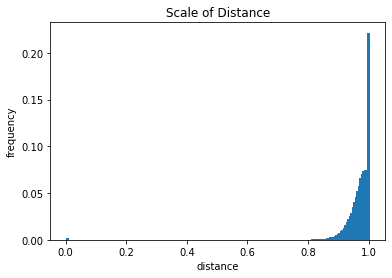

In [15]:
draw_dist_freq(dm)

$SC$ 随 $k$ 变化趋势：

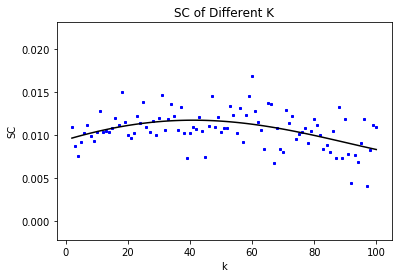

In [16]:
draw_trend(list(scs.keys()),list(scs.values()),4,"k","SC","SC of Different K")

$CP$ 随 $k$ 变化趋势：

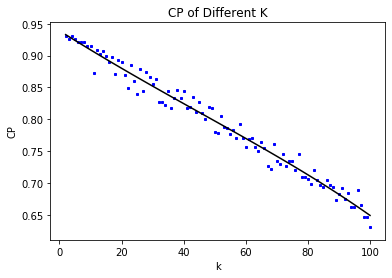

In [17]:
draw_trend(list(cps.keys()),list(cps.values()),4,"k","CP","CP of Different K")

**结论**

如果计算准确，$CP$ 变化趋势就应该如图所示呈总体下降趋势（当k取点的数目是就应该$CP$必定是0）。而 $SC$ 随着 $K$ 的变大先变大后变小，当k=25时达到最大，在0-20范围内也有数个大于0.01的点，考虑到数据集只有486个点，我认为取$[3,30]$且$SC$较大，$CP$没有异常增大的$K$是不错的选择。